In [1]:
from GVAMP_algo import *

In [23]:
l2_vec = [0,0.01,0.05,0.1,0.2]
asp_vec = [0.2,0.5,1]
rho = 0.1  # sparsity parameter of the teacher
delta0 = 0
d=200
nb = 20
l1=0.1
l2_tilde=0
conv_mat1 = np.zeros((len(l2_vec),nb))
ang_mat1 = np.zeros((len(l2_vec),nb))

conv_mat02 = np.zeros((len(l2_vec),nb))
ang_mat02 = np.zeros((len(l2_vec),nb))

In [25]:
for i in range(len(l2_vec)):
    n=200
    print(i)
    l2=l2_vec[i]
    x0 = gauss_bernoulli(rho,d)
    w = np.random.normal(0,np.sqrt(delta0),n)
    F_train = np.random.normal(0,np.sqrt(1/n),(n,d)) #F_train,D=build_matrix((1-asp)**2,(1+asp)**2,n,d,asp,1) 
    y_train = np.sign(F_train@x0+w)    
    x_train, conv_vec, ang_vec, ls_vec = GVAMP(F_train, y_train, x0, l1, l2, loss='logistic', damp=0, nb_iterations=nb, tol=1e-20)
    conv_mat1[i,:] = conv_vec
    ang_mat1[i,:] = ang_vec

0
1
2
3
4


In [26]:
for i in range(len(l2_vec)):
    n=40
    print(i)
    l2=l2_vec[i]
    x0 = gauss_bernoulli(rho,d)
    w = np.random.normal(0,np.sqrt(delta0),n)
    F_train = np.random.normal(0,np.sqrt(1/n),(n,d)) #F_train,D=build_matrix((1-asp)**2,(1+asp)**2,n,d,asp,1) 
    y_train = np.sign(F_train@x0+w)    
    x_train, conv_vec, ang_vec, ls_vec = GVAMP(F_train, y_train, x0, l1, l2, loss='logistic', damp=0, nb_iterations=nb, tol=1e-20)
    conv_mat02[i,:] = conv_vec
    ang_mat02[i,:] = ang_vec

0
1
2
3
4


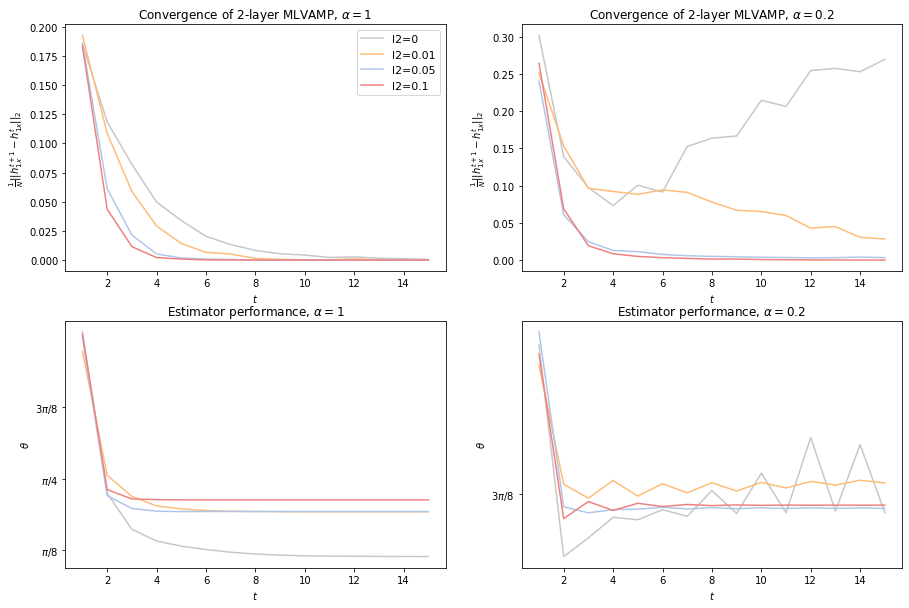

In [41]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
color_vec = ['#c7c7c7','#ffbb78','#aec7e8','lightcoral']
l2_vec_p = [0,0.01,0.05,0.1]
for j in range(len(l2_vec_p)):
    reg = l2_vec[j]
    axes[0,0].plot(np.linspace(1,15,15),conv_mat1[j,:15],color = color_vec[j],label='l2='+str(reg))
    axes[0,0].set_ylabel(r'$\frac{1}{N}||h_{1x}^{t+1}-h_{1x}^{t}||_{2}$')
    axes[0,0].set_xlabel(r'$t$')
    axes[0,0].set_title('Convergence of 2-layer MLVAMP, '+r'$\alpha = 1$')
    #plt.tight_layout()
    axes[0,0].legend(fontsize = 11)
    
for j in range(len(l2_vec_p)):
    reg = l2_vec[j]
    plt.setp(axes[1,0],yticks=[np.pi/8,np.pi/4,3*np.pi/8],yticklabels=[r'$\pi/8$',r'$\pi/4$',r'$3\pi/8$'])
    axes[1,0].plot(np.linspace(1,15,15),ang_mat1[j,:15],color = color_vec[j])
    axes[1,0].set_ylabel(r'$\theta$')
    axes[1,0].set_xlabel(r'$t$')
    axes[1,0].set_title('Estimator performance, '+r'$\alpha = 1$')
    #plt.tight_layout()
    #axes[1,0].legend(fontsize = 11)

for j in range(len(l2_vec_p)):
    reg = l2_vec[j]
    axes[0,1].plot(np.linspace(1,15,15),conv_mat02[j,:15],color = color_vec[j])
    axes[0,1].set_ylabel(r'$\frac{1}{N}||h_{1x}^{t+1}-h_{1x}^{t}||_{2}$')
    axes[0,1].set_xlabel(r'$t$')
    axes[0,1].set_title('Convergence of 2-layer MLVAMP, '+r'$\alpha = 0.2$')
    #plt.tight_layout()
    #axes[0,1].legend(fontsize = 11)
    
for j in range(len(l2_vec_p)):
    reg = l2_vec[j]
    plt.setp(axes[1,1],yticks=[np.pi/8,np.pi/4,3*np.pi/8],yticklabels=[r'$\pi/8$',r'$\pi/4$',r'$3\pi/8$'])
    axes[1,1].plot(np.linspace(1,15,15),ang_mat02[j,:15],color = color_vec[j])
    axes[1,1].set_ylabel(r'$\theta$')
    axes[1,1].set_xlabel(r'$t$')
    axes[1,1].set_title('Estimator performance, '+r'$\alpha = 0.2$')
    #plt.tight_layout()
    #axes[1,1].legend(fontsize = 11)

        
plt.savefig('Figure3', dpi=500, quality = 95)